In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

from numpy.linalg import svd


In [3]:
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [4]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix : \n', np.round(U,3))
print('Sigma matrix : \n', np.round(Sigma,3))
print('Vt matrix : \n', np.round(Vt,3))

(4, 4) (4,) (4, 4)
U matrix : 
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma matrix : 
 [3.423 2.023 0.463 0.079]
Vt matrix : 
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [6]:
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [9]:
#Truncated SVD
from scipy.sparse.linalg import svds
from scipy.linalg import svd

np.random.seed(121)
matrix = np.random.random((6,6))
print('원본 행렬 : \n', matrix)
U, Sigma, Vt = svd(matrix, full_matrices = False)
print('\n 분해 행렬 차원 : ', U.shape, Sigma.shape, Vt.shape)
print('Sigma matrix : \n', Sigma)

num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k = num_components)
print('\n 분해 행렬 차원 : ', U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('Sigma matrix : \n', Sigma)
matrix_tr = np.dot(np.dot(U_tr, np.diag(Sigma_tr)),Vt_tr)

print('\n Truncated SVD 분해 후 복원 행렬 : ', matrix_tr)

원본 행렬 : 
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

 분해 행렬 차원 :  (6, 6) (6,) (6, 6)
Sigma matrix : 
 [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

 분해 행렬 차원 :  (6, 4) (4,) (4, 6)
Sigma matrix : 
 [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

 Truncated SVD 분해 후 복원 행렬 :  [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.9386868

Text(0, 0.5, 'Truncated SVD Components 2')

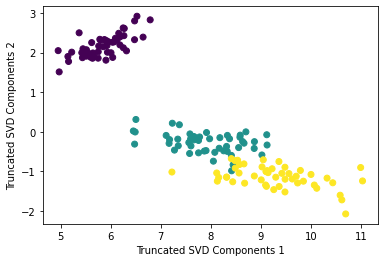

In [10]:
# 사이킷런 truncated SVD

from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris


iris = load_iris()
iris_ftrs = iris.data

tsvd = TruncatedSVD(n_components = 2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

plt.scatter(x = iris_tsvd[:,0], y = iris_tsvd[:,1],c = iris.target)
plt.xlabel('Truncated SVD Components 1')
plt.ylabel('Truncated SVD Components 2')

Text(0.5, 1.0, 'PCA')

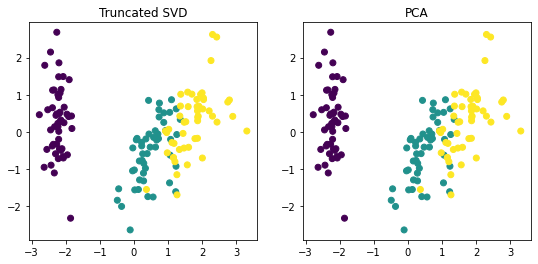

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

tsvd = TruncatedSVD(n_components = 2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

pca = PCA(n_components = 2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

fig, (ax1,ax2) = plt.subplots(figsize = (9,4), ncols = 2)
ax1.scatter(x = iris_tsvd[:,0], y = iris_tsvd[:,1],c = iris.target)
ax2.scatter(x = iris_pca[:,0], y = iris_pca[:,1],c = iris.target)
ax1.set_title('Truncated SVD')
ax2.set_title('PCA')

In [14]:
print((iris_pca - iris_tsvd).mean())
print((pca.components_ - tsvd.components_).mean())

2.347954007146195e-15
-5.724587470723463e-17
